# Process 'Company Previous Role' Question Using a LLM

A generic version of the pipeline to be re-used for different types of questions.

Andrew Weng, 1/1/2025

We are going to use a mixed LLM-Python approach to solve the problem of "user text categorization."

This problem can be decomposed into five steps:

1. Pre-process (LLM1)
 - Each user provides up to three keywords as a string. These keywords need to be normalized and stored in a large list of individual keywords for the next stage.
2. Define categories (LLM2)
 - With the list of keywords, find the best set of categories to describe the keywords
3. Assign categories (LLM3)
 - For each keyword, assign it to a category. Be careful about how to handle exceptions (e.g., a keyword that doesn't seem to belog into any particular category.)
4. Count occurences (Python)
 - Within each category, sum up the total number of keywords. 
5. Visualize the results (Python)

In [1]:
import os
import time

current_folder = os.path.basename(os.getcwd())
if current_folder == 'notebooks':
    root_path = os.path.dirname(os.path.abspath(''))
    os.chdir(root_path)

from src.analyst import Analyst
from src.plotter import Plotter
from src.llm import LLM

from collections import defaultdict

import pickle
from pprint import pprint

from IPython import get_ipython
# Automatically reload all modules every time a line of code is executed
get_ipython().run_line_magic('load_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')

# Initialize our helper classes

In [3]:
analyst = Analyst()
analyst.load_data()
analyst.build_respondents_list()

plotter = Plotter()
llm = LLM()

# Fetch the relevant dataset to analyze

In [ ]:
question = dict()
question['tag'] = 'company_role_prev'
question['question'] = "What was your previous role before joining the battery industry?"
question['categories'] = [
 'Mechanical Engineering',
 'Electrical Engineering',
 'Chemical Engineering',
 'Materials Engineering/Science',
 'Software Engineering/IT',
 'Scientific Research',
 'Project Management',
 'Product Management',
 'Business Development/Sales/Marketing',
 'Finance/Investment',
 'Education/Teaching',
 'Legal/Patent',
 'Quality Management',
 'Consulting',
 'Manufacturing/Process Engineering',
 'Automotive Industry',
 'Energy Industry (Solar/Wind/Oil & Gas)',
 'Telecommunications',
 'Defense/Military',
 'Administration/Support Staff',
 'Technician/Lab Technician',
 'Pharmaceuticals',
 'Construction',
 'Supply Chain/Procurement',
 'Aerospace/Drone/Aircraft Maintenance',
 'Maintenance/Repair Engineering',
 'Data Science/Machine Learning',
 'Executive Leadership',
 'Climate Science/Communication',
 'Healthcare/Medical Devices'
 ]
question['data'] = analyst.summarize_company_role()['role_prev_role_list']

In [ ]:
question = dict()
question['tag'] = 'student_ideal_title'
question['categories'] = []
question['question'] = 'After you graduate, what would be your ideal job titel?'
question['data'] = analyst.summarize_student_ideal()['ideal_job_title_list']

In [5]:
question['data']

['Distinguished Member of Technical Staff, Design for Reliability',
 'Administrative Assistant',
 'product manger',
 'Machine Design Engineer',
 'Mechanical Engineer - Turbine Airfoils',
 'Investment Analyst',
 'Product development - body exterior',
 'Director of R&D',
 'Simulation engineer',
 'Automotive engineering for autonomous vehicles',
 'Senior Scientist',
 'project manager',
 'Instrumentation Engineer',
 'Patent Analyst',
 'Electrical Grid engineer',
 'Software Engineer',
 'Applications Engineer',
 'Scientist',
 'R&D in polymers industry',
 'Electronics manufacturing industry',
 'Senior Sourcing Manager',
 'Business Development Manager',
 'Senior Engineer',
 'Senior Materials Engineer',
 'Chemicals',
 'Laboratory Scientist',
 'engineer',
 'Metrology engineer',
 'solar expert',
 'Materials Scientist',
 'Automotive supplier analyst',
 'Science education and outreach',
 'Software engineer',
 'Intern for fuel cell manufacturing, graduate student',
 'I had many roles',
 'R&D',
 'Tec

# Pre-process the user response

Interpret the delimiters

In [6]:
# If only a single keyword is expected then skip this step

keyword_list = question['data']

# Define categories

In [7]:
if question['categories'] == []:

    categories = llm.define_categories(question['question'], keyword_list,
                                   num_categories=50)

    category_list = []
    for category in categories['categories']:
        category_list.append(category['name'])
else:
    category_list = question['categories']

pprint(category_list)

['Mechanical Engineering',
 'Electrical Engineering',
 'Chemical Engineering',
 'Materials Engineering/Science',
 'Software Engineering/IT',
 'Scientific Research',
 'Project Management',
 'Product Management',
 'Business Development/Sales/Marketing',
 'Finance/Investment',
 'Education/Teaching',
 'Legal/Patent',
 'Quality Management',
 'Consulting',
 'Manufacturing/Process Engineering',
 'Automotive Industry',
 'Energy Industry (Solar/Wind/Oil & Gas)',
 'Telecommunications',
 'Defense/Military',
 'Administration/Support Staff',
 'Technician/Lab Technician',
 'Pharmaceuticals',
 'Construction',
 'Supply Chain/Procurement',
 'Aerospace/Drone/Aircraft Maintenance',
 'Maintenance/Repair Engineering',
 'Data Science/Machine Learning',
 'Executive Leadership',
 'Climate Science/Communication',
 'Healthcare/Medical Devices',
 'Other/Miscellaneous']


# Assign categories

Process one keyword at a time!

In [8]:
content_list = []
other_list = []
fail_list = []

for i, keyword in enumerate(keyword_list):

    print(f"Processing response: '{keyword}' ({i+1} of {len(keyword_list)})...")

    try:
        output = llm.classify_user_response(category_list, keyword,
                                            model='gpt-4o-mini')
    except: # JSON output fails
        fail_list.append(keyword)
        continue

    if output['result']['category'] in category_list:
        content_list.append(output)
    else:
        other_list.append(output)

Processing response: 'Distinguished Member of Technical Staff, Design for Reliability' (1 of 192)...
Processing response: 'Administrative Assistant' (2 of 192)...
Processing response: 'product manger' (3 of 192)...
Processing response: 'Machine Design Engineer' (4 of 192)...
Processing response: 'Mechanical Engineer - Turbine Airfoils' (5 of 192)...
Processing response: 'Investment Analyst' (6 of 192)...
Processing response: 'Product development - body exterior' (7 of 192)...
Processing response: 'Director of R&D' (8 of 192)...
Processing response: 'Simulation engineer' (9 of 192)...
Processing response: 'Automotive engineering for autonomous vehicles' (10 of 192)...
Processing response: 'Senior Scientist' (11 of 192)...
Processing response: 'project manager' (12 of 192)...
Processing response: 'Instrumentation Engineer' (13 of 192)...
Processing response: 'Patent Analyst' (14 of 192)...
Processing response: 'Electrical Grid engineer' (15 of 192)...
Processing response: 'Software Engin

In [9]:
print(len(other_list))

3


In [10]:
other_list

[{'result': {'response_text': 'I had many roles', 'category': 'Other'}},
 {'result': {'response_text': 'Engineer', 'category': 'Other'}},
 {'result': {'response_text': 'Specialist', 'category': 'Other'}}]

In [11]:
print(len(fail_list))

0


## Assembly dictionary for plotting and a 'collection' dictionary

The 'collection' is a reference for which keywords got sorted into which categories.

In [12]:

collection = defaultdict(list)
counter    = defaultdict(int)

for content in content_list:

    category = content['result']['category']
    response = content['result']['response_text']
    counter[category] += 1
    collection[category].append(response)

counter['_tot_'] = len(question['data'])
counter

defaultdict(int,
            {'Quality Management': 5,
             'Administration/Support Staff': 1,
             'Product Management': 7,
             'Mechanical Engineering': 7,
             'Finance/Investment': 3,
             'Scientific Research': 25,
             'Software Engineering/IT': 9,
             'Automotive Industry': 6,
             'Project Management': 10,
             'Electrical Engineering': 12,
             'Legal/Patent': 1,
             'Materials Engineering/Science': 11,
             'Manufacturing/Process Engineering': 11,
             'Supply Chain/Procurement': 1,
             'Business Development/Sales/Marketing': 16,
             'Other/Miscellaneous': 5,
             'Chemical Engineering': 8,
             'Technician/Lab Technician': 3,
             'Energy Industry (Solar/Wind/Oil & Gas)': 9,
             'Education/Teaching': 7,
             'Aerospace/Drone/Aircraft Maintenance': 2,
             'Pharmaceuticals': 3,
             'Consulting': 

In [13]:
collection

defaultdict(list,
            {'Quality Management': ['Distinguished Member of Technical Staff, Design for Reliability',
              'Metrology engineer',
              'Total quality management',
              'Quality and Campaign Prevention Supervisor',
              'Test Engineer'],
             'Administration/Support Staff': ['Administrative Assistant'],
             'Product Management': ['product manger',
              'Product development - body exterior',
              'Product Management',
              'Sr Product specialist',
              'Product Line Manager',
              'Product Support Engineer',
              'Product Line Manager'],
             'Mechanical Engineering': ['Machine Design Engineer',
              'Mechanical Engineer - Turbine Airfoils',
              'Design Engineer',
              'Mechanical Engineering',
              'Mechanical Design Engineering',
              'Thermal engineer / mechanical engineer',
              'Mechanical Engineer

# Visualize the results

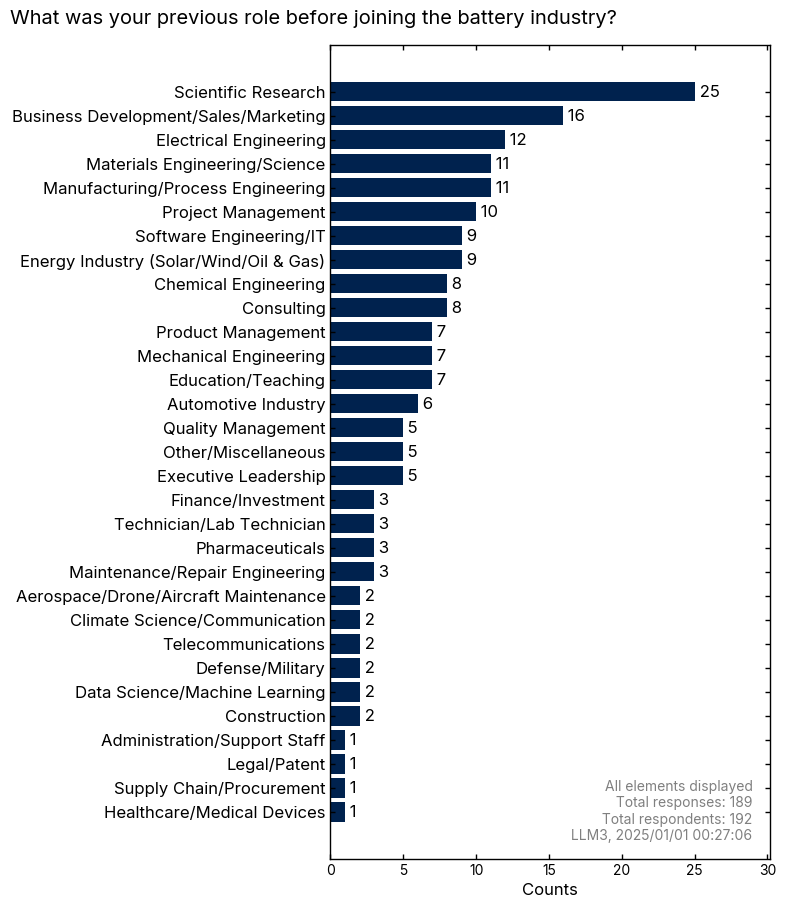

In [14]:
plotter.make_bar_plot_from_dict(counter,
                                title=question['question'],
                                sorted=True,
                                annotation=f'LLM3, {time.strftime("%Y/%m/%d %H:%M:%S")}',
                                num_elements=100,
                                saveas=f'{question['tag']}_{time.strftime("%Y%m%d_%H%M%S")}.png'
)